In [12]:
from keras.api import layers, models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.api import metrics
import tensorflow as tf
tf.random.set_seed(1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Sentiment has 3 classes

In [13]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.8, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.8, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(1, activation='sigmoid', name="opinion"))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(name="precision"), metrics.Recall(name="recall")],
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ opinion (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,601 (6.03 MB)

 Trainable params: 1,581,001 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [14]:
df_original = pd.read_csv("data/processed/processed_tweets.csv")

In [15]:
df_original.head()

,text,Sentiment,Has opinion,cleaned_text,word_vectors,glove_vectors
0,iPad: “Welcome to Apple Intelligence the newes...,-1.0,0.0,ipad welcome apple intelligence new ipad,"[array([-2.04101562e-01, -1.73828125e-01, -2.2...","[array([ 0.11563 , 0.3842 , -0.16833 , 0..."
1,"I believe they call it ""Apple Intelligence"", Sara",0.0,0.0,believe call apple intelligence sara,"[array([-0.1640625 , 0.01080322, 0.03320312,...","[array([-2.8593e-01, 3.4309e-01, -3.6802e-01,..."
2,"Unfortunately, there's ""Apple Intelligence"" ad...",-1.0,0.0,unfortunately apple intelligence add software ...,"[array([ 8.39233398e-04, 2.33154297e-02, -1.9...","[array([-0.12328 , 0.016084 , -0.196 , 0..."
3,i did turn it off globally but idk how off it ...,0.0,0.0,turn globally idk truly,"[array([-0.06298828, 0.10693359, -0.00549316,...","[array([ 1.9474e-01, 3.8828e-01, 1.3956e-01,..."
4,"Uh…yeah. Yes, do that, Apple. I’m fine with th...",-1.0,0.0,uhyeah yes apple fine leave intelligence,"[array([ 1.15722656e-01, -1.29882812e-01, 6.5...","[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0...."


In [16]:
df_with_unlabeled = df_original.copy()
df_with_unlabeled = df_with_unlabeled[df_with_unlabeled["Has opinion"].isna()]
df_original = df_original.dropna(subset=["Has opinion"])
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           400 non-null    object 
 1   Sentiment      400 non-null    float64
 2   Has opinion    400 non-null    float64
 3   cleaned_text   400 non-null    object 
 4   word_vectors   400 non-null    object 
 5   glove_vectors  400 non-null    object 
dtypes: float64(2), object(4)
memory usage: 21.9+ KB


In [17]:
df_original["Has opinion"].value_counts()

Has opinion
0.0    209
1.0    191
Name: count, dtype: int64

In [18]:
padded_vectors = np.load("data/processed/padded_glove_vectors.npy")
padded_vectors = padded_vectors[:400]

In [19]:
padded_vectors.shape

(400, 26, 300)

In [20]:
df_original["Has opinion"].value_counts()

Has opinion
0.0    209
1.0    191
Name: count, dtype: int64

In [21]:
# padded_vectors_average = np.mean(padded_vectors, axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(padded_vectors, df_original["Has opinion"], test_size=0.2, random_state=1)

In [23]:
X_train.shape

(320, 26, 300)

In [24]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count} occurences")

0.0: 165 occurences
1.0: 155 occurences


In [25]:
history = model.fit(x=X_train, y=y_train, epochs=50)

Epoch 1/50


2025-02-15 22:25:04.108575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4437 - loss: 0.9071 - precision: 0.4159 - recall: 0.4421
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4983 - loss: 0.8704 - precision: 0.4656 - recall: 0.4850
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5625 - loss: 0.7547 - precision: 0.5365 - recall: 0.5185
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5678 - loss: 0.7718 - precision: 0.5397 - recall: 0.5283
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6476 - loss: 0.6510 - precision: 0.6176 - recall: 0.6526
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5914 - loss: 0.7054 - precision: 0.5654 - recall: 0.5669
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6504 - loss: 0.6508 - precision: 0.6273 - recall: 0.6204
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6325 - loss: 0.6624 - precision: 0.6057 - recall: 0.6338
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━

In [26]:
history.history

{'accuracy': [0.46875,
  0.49687498807907104,
  0.578125,
  0.5687500238418579,
  0.6625000238418579,
  0.6156250238418579,
  0.671875,
  0.640625,
  0.668749988079071,
  0.6781250238418579,
  0.671875,
  0.6625000238418579,
  0.706250011920929,
  0.737500011920929,
  0.6781250238418579,
  0.6968749761581421,
  0.706250011920929,
  0.6968749761581421,
  0.7250000238418579,
  0.753125011920929,
  0.75,
  0.746874988079071,
  0.699999988079071,
  0.778124988079071,
  0.784375011920929,
  0.784375011920929,
  0.78125,
  0.796875,
  0.778124988079071,
  0.809374988079071,
  0.84375,
  0.8656250238418579,
  0.828125,
  0.840624988079071,
  0.871874988079071,
  0.856249988079071,
  0.8812500238418579,
  0.875,
  0.8531249761581421,
  0.862500011920929,
  0.887499988079071,
  0.878125011920929,
  0.893750011920929,
  0.918749988079071,
  0.890625,
  0.8500000238418579,
  0.9125000238418579,
  0.9125000238418579,
  0.90625,
  0.9125000238418579],
 'loss': [0.8836943507194519,
  0.8737249374389

In [27]:
model.save("models/opinion_detection_original.keras")

Text(0.5, 0, 'epoch')

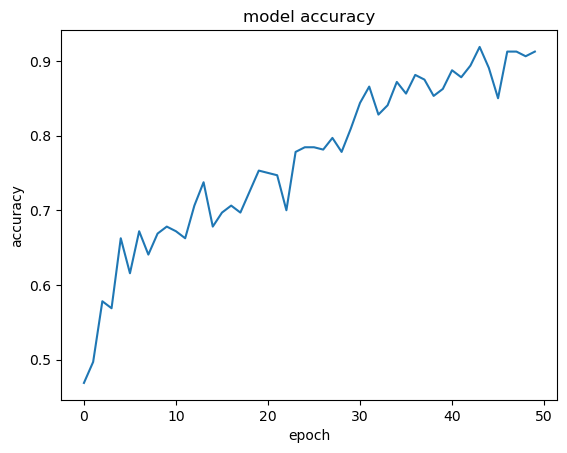

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

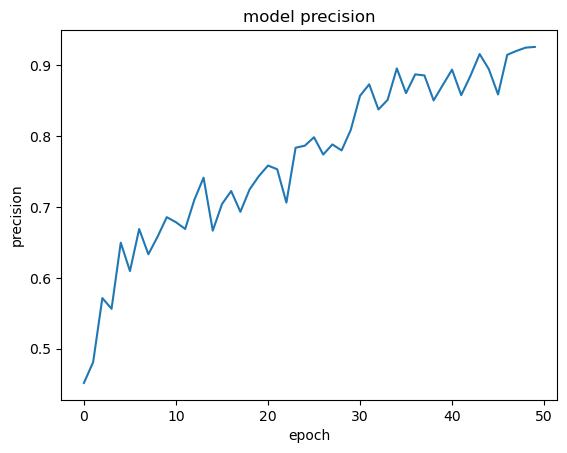

In [29]:
plt.plot(history.history['precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

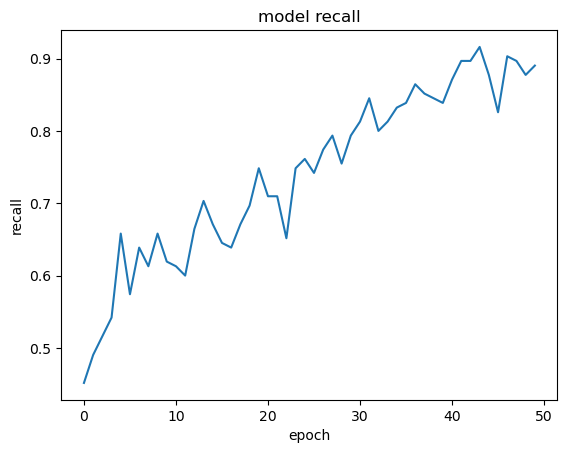

In [30]:
plt.plot(history.history['recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

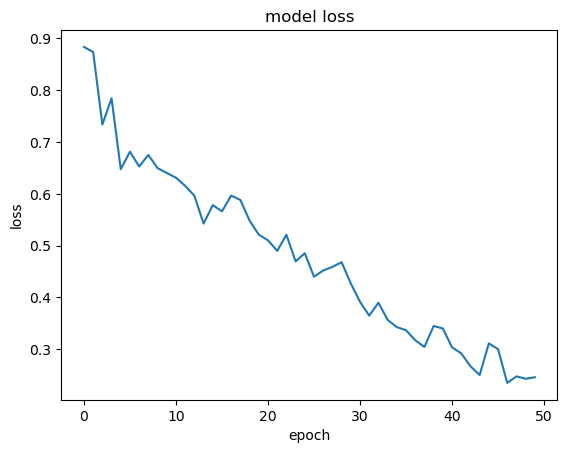

In [31]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [32]:
evaluation = model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6172 - loss: 0.7549 - precision: 0.5257 - recall: 0.6485


In [33]:
print(f'Loss: {evaluation[0]}, accuracy: {evaluation[1]}')

Loss: 0.7572852969169617, accuracy: 0.625


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


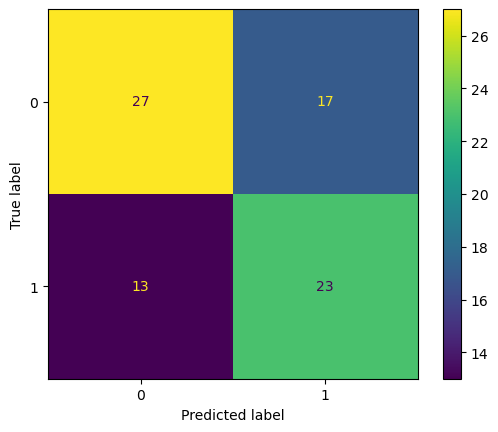

In [34]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
matrix = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(matrix)
display.plot()

In [35]:
model = models.Sequential()

model.add(layers.Input(shape=(26, 300), name="Domain_1"))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation='relu', name="layer_1"))

model.add(layers.Dropout(0.8, name="dropout_3"))

model.add(layers.BatchNormalization(name="batch_normalization_3"))

model.add(layers.Dense(100, activation='relu', name="layer_2"))

model.add(layers.Dropout(0.8, name="dropout_4"))

model.add(layers.BatchNormalization(name="batch_normalization_4"))

model.add(layers.Dense(1, activation='sigmoid', name="opinion"))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 7800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 200)            │     1,560,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ opinion (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,601 (6.03 MB)

 Trainable params: 1,581,001 (6.03 MB)

 Non-trainable params: 600 (2.34 KB)

In [36]:
df_with_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7491 entries, 400 to 7890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           7491 non-null   object 
 1   Sentiment      0 non-null      float64
 2   Has opinion    0 non-null      float64
 3   cleaned_text   7486 non-null   object 
 4   word_vectors   7491 non-null   object 
 5   glove_vectors  7491 non-null   object 
dtypes: float64(2), object(4)
memory usage: 409.7+ KB


In [37]:
unlabeled_padded_vectors = np.load("data/processed/padded_glove_vectors.npy")[401:]
# unlabeled_padded_vectors = unlabeled_padded_vectors.mean(axis=1)
unlabeled_padded_vectors.shape

(7490, 26, 300)

In [38]:
print("Labeled data shape:", padded_vectors.shape)  # Expect (198, 300)
print("Unlabeled data shape:", unlabeled_padded_vectors.shape)  # Expect (n, 300)


Labeled data shape: (400, 26, 300)
Unlabeled data shape: (7490, 26, 300)


In [39]:

from scripts.DataDistillation import DataDistillation

distillation = DataDistillation(
    model,
    (padded_vectors, df_original["Has opinion"]),
    unlabeled_padded_vectors, epochs=10, pseudo_batch_size=1000, random_state=1, validation_split=0.2
)


In [40]:
distillation.start()

Starting Data Distillation
Training model on labeled training data...
Evaluating model on internal validation set...
Teacher performance on internal validation set: 0.625
Starting iteration 1
Teacher predicting next unlabeled data batch with shape: (1000, 26, 300)
Pseudo-labeled samples in this iteration: 1000
Training student on combined data with size (632, 26, 300)
Evaluating model on internal validation set...
Student performance on internal validation set: 0.6000000238418579
Student did not outperform teacher. Stopping data distillation.
Data distillation process completed.
Final teacher performance on internal validation set: 0.625


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


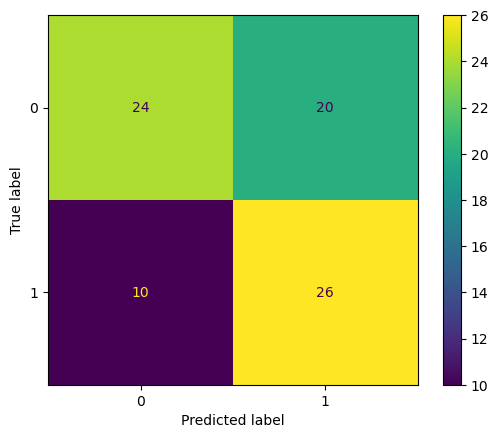

In [41]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
matrix = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(matrix)
display.plot()

In [ ]:
best_model = distillation.get_model()
best_model.summary()